In [59]:
from __future__ import division

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import mlib.lib as mlib

pd.set_option('display.max_columns', None)

In [12]:
data = pd.read_csv('./datasets/soybean.csv')

In [5]:
print data.shape

(683, 36)


In [17]:
data.head(5)

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,plant-growth,leaves,leafspots-halo,leafspots-marg,leafspot-size,leaf-shread,leaf-malf,leaf-mild,stem,lodging,stem-cankers,canker-lesion,fruiting-bodies,external-decay,mycelium,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,type
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,no,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,abnorm,abnorm,absent,dna,dna,absent,absent,absent,abnorm,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [28]:
predictors = list(data.columns[:-1])

Seems all predictors are categorical.

In [27]:
data.dtypes

date               object
plant-stand        object
precip             object
temp               object
hail               object
crop-hist          object
area-damaged       object
severity           object
seed-tmt           object
germination        object
plant-growth       object
leaves             object
leafspots-halo     object
leafspots-marg     object
leafspot-size      object
leaf-shread        object
leaf-malf          object
leaf-mild          object
stem               object
lodging            object
stem-cankers       object
canker-lesion      object
fruiting-bodies    object
external-decay     object
mycelium           object
int-discolor       object
sclerotia          object
fruit-pods         object
fruit spots        object
seed               object
mold-growth        object
seed-discolor      object
seed-size          object
shriveling         object
roots              object
type               object
dtype: object

Find columns with NA values. Type column does not belong to them.

In [36]:
na_names = filter(lambda name: any(data[name].isnull()), data.columns)
print len(na_names)
print na_names

34
['date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', 'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external-decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots']


Look at most absent values.

In [70]:
na_freqs = map(lambda name: (name, sum(data[name].isnull()) / len(data[name]) * 100), na_names)
for name, freq in sorted(na_freqs, key=lambda (v1, v2): v2, reverse=True):
    print name, freq

hail 17.7159590044
severity 17.7159590044
seed-tmt 17.7159590044
lodging 17.7159590044
germination 16.3982430454
leaf-mild 15.8125915081
fruiting-bodies 15.5197657394
fruit spots 15.5197657394
seed-discolor 15.5197657394
shriveling 15.5197657394
leaf-shread 14.6412884334
seed 13.4699853587
mold-growth 13.4699853587
seed-size 13.4699853587
leafspots-halo 12.298682284
leafspots-marg 12.298682284
leafspot-size 12.298682284
leaf-malf 12.298682284
fruit-pods 12.298682284
precip 5.56368960469
stem-cankers 5.56368960469
canker-lesion 5.56368960469
external-decay 5.56368960469
mycelium 5.56368960469
int-discolor 5.56368960469
sclerotia 5.56368960469
plant-stand 5.27086383602
roots 4.53879941435
temp 4.39238653001
crop-hist 2.34260614934
plant-growth 2.34260614934
stem 2.34260614934
date 0.146412884334
area-damaged 0.146412884334


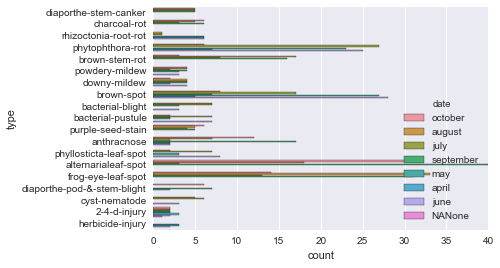

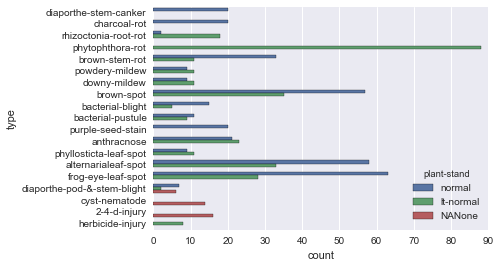

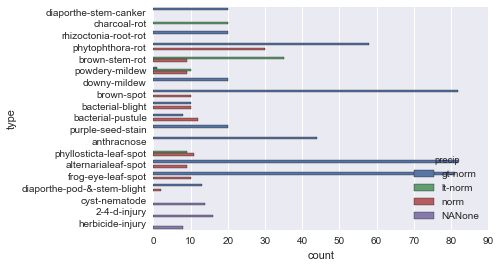

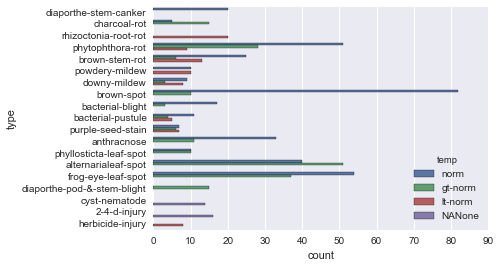

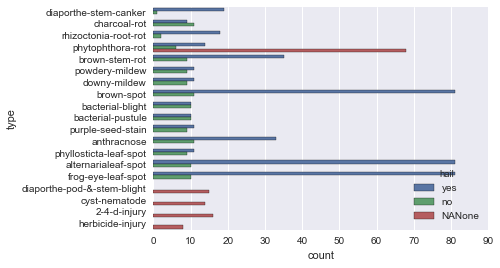

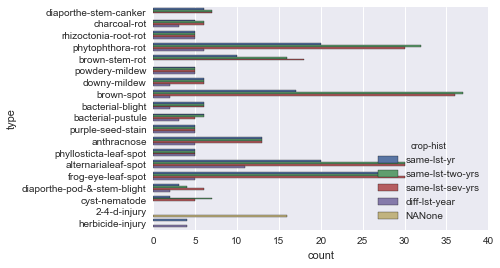

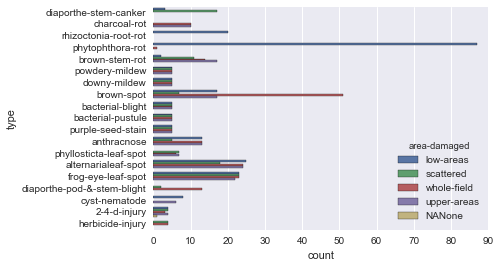

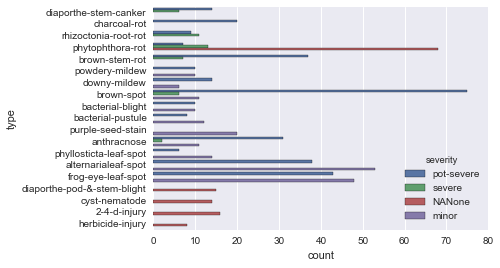

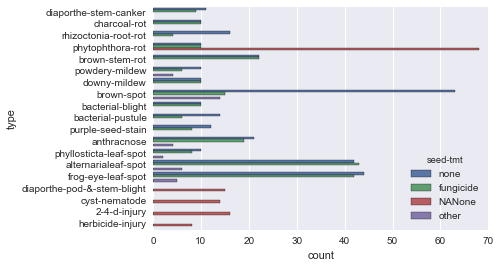

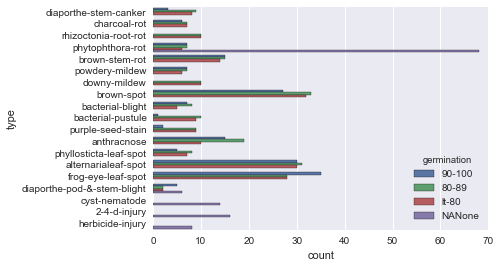

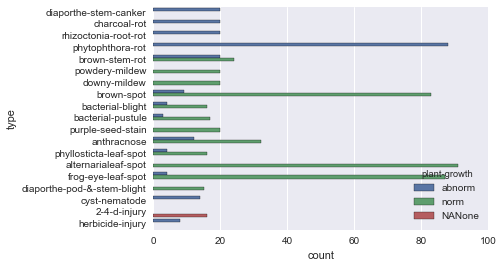

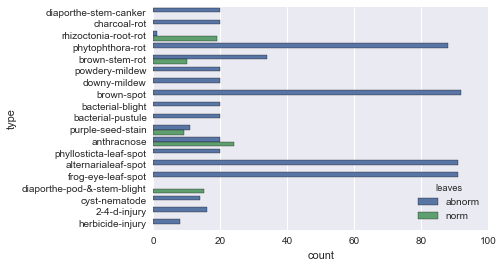

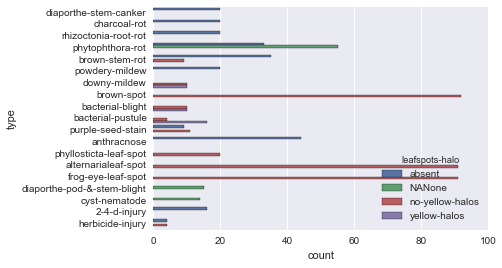

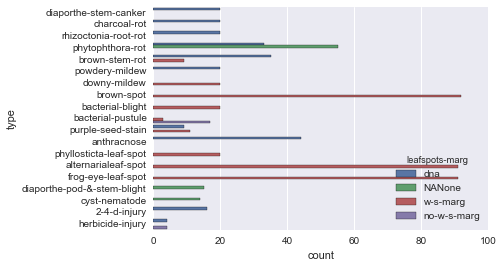

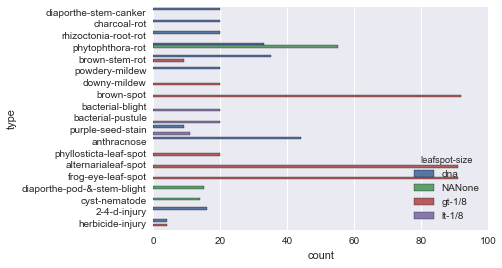

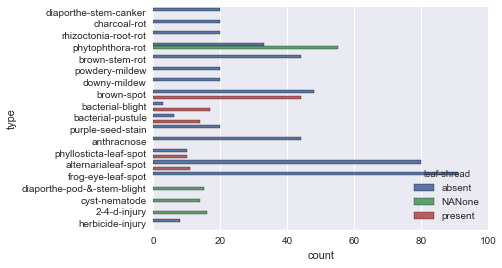

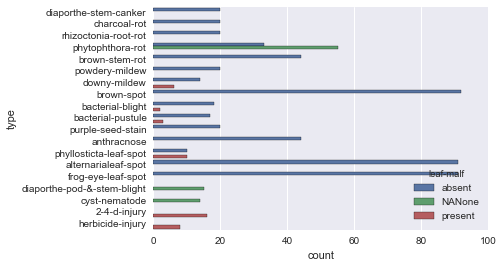

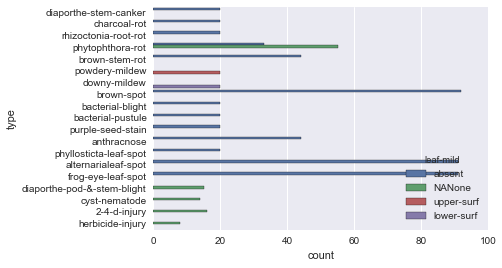

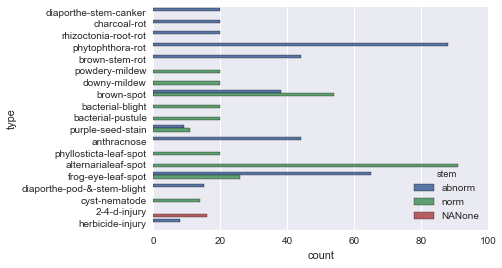

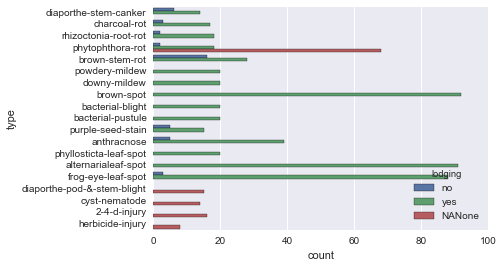

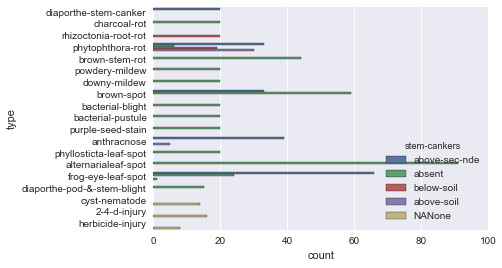

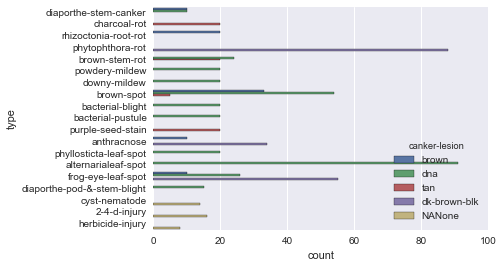

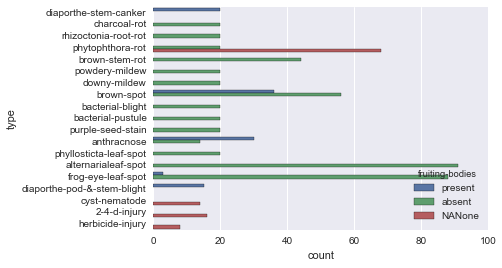

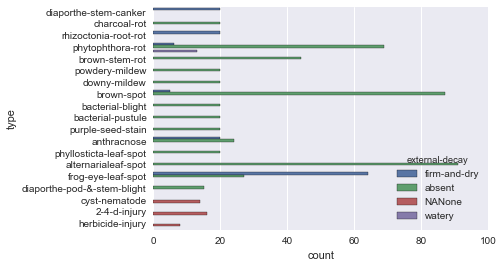

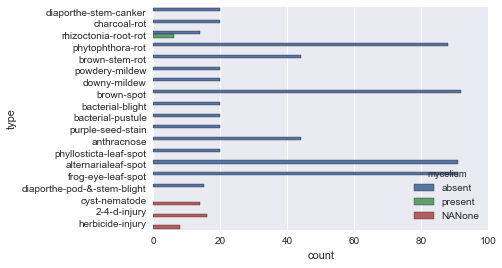

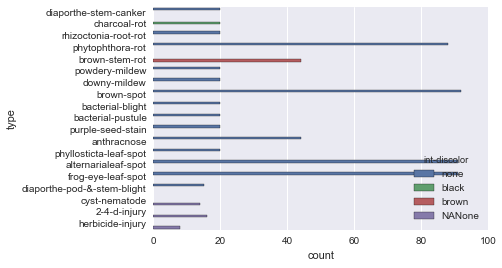

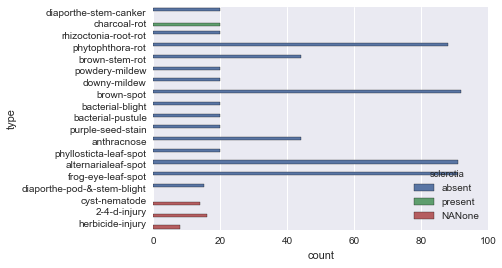

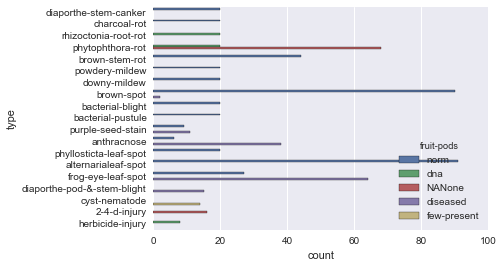

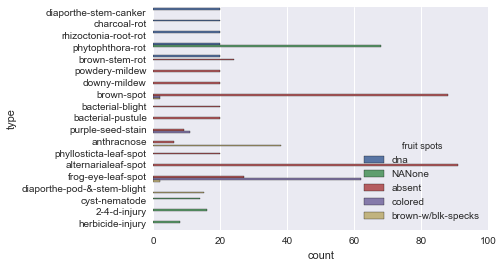

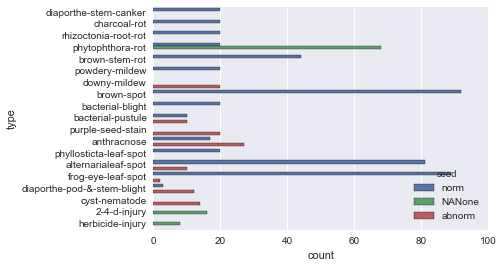

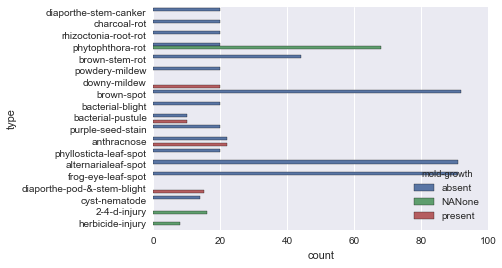

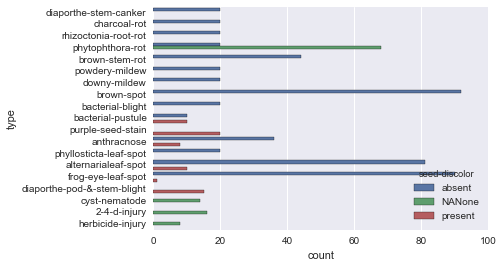

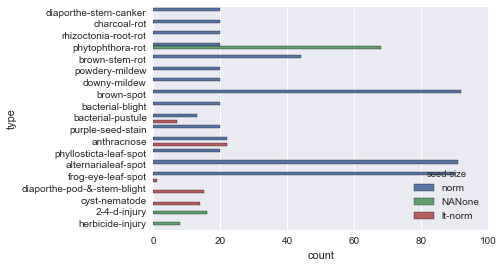

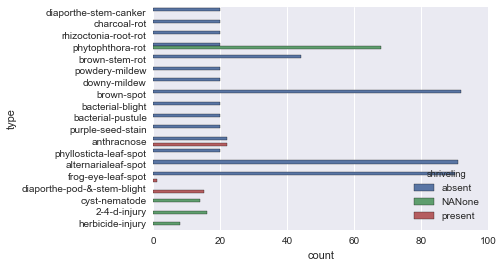

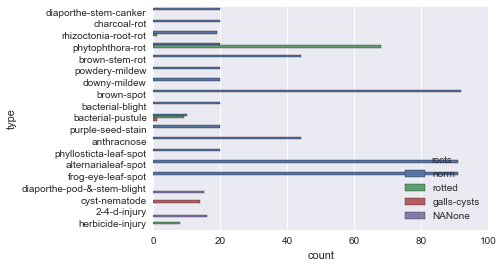

In [73]:
for name in predictors:
    sns.countplot(data=data.fillna(value='NANone'), hue=name, y='type')
    plt.show()